# Исследование статистик трехочковых бросков в NBA за 2021 год. 

Заказчик - одна из команд национальной баскетбольной ассоциации. Необходимо проанализировать метрики различных игроков в зависимости от их позиции на парке. Выявить зависимость влияния трехочковых бросков на результаты команд. 
Входные данные - .csv - файл с метриками игроков, предоставленные официальным сайтом NBA. 

## Шаг 1. Открыть файл с данными и изучить общую информацию.

Импортируем библиотеку pandas и matplotlib для обработки и анализа табличных данных. 


In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('NBA_stats.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Player                         2728 non-null   object 
 1   Pos                            2728 non-null   object 
 2   Age                            2728 non-null   int64  
 3   Team                           2728 non-null   object 
 4   Games                          2728 non-null   int64  
 5   Minutes Played                 2728 non-null   float64
 6   Fields Goal                    2728 non-null   float64
 7   Fields Goal Attempted          2728 non-null   float64
 8   3-points Field Goal            2728 non-null   float64
 9   3-points Field Goal Attempted  2728 non-null   float64
 10  2-points Field Goal            2728 non-null   float64
 11  2-points Field Goal Attempted  2728 non-null   float64
 12  Free Throws                    2728 non-null   f

,Age,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,2-points Field Goal,2-points Field Goal Attempted,Free Throws,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,...,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,25.994868,40.441349,19.135960,3.076026,6.810704,0.890836,2.548570,2.186694,4.264846,1.304509,...,2.694941,3.492045,1.840506,0.609897,0.383834,1.065029,1.667815,8.343585,267.861437,2019.512097
std,4.099958,24.811372,9.135915,2.180854,4.564814,0.827013,2.130376,1.761301,3.268963,1.273998,...,1.829902,2.415955,1.708985,0.415554,0.394190,0.792267,0.794244,6.030599,154.026176,1.119812
min,19.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,23.000000,18.000000,12.000000,1.400000,3.400000,0.200000,0.800000,0.900000,1.800000,0.500000,...,1.400000,1.800000,0.700000,0.300000,0.100000,0.500000,1.100000,3.900000,133.000000,2019.000000
50%,25.000000,42.000000,18.900000,2.600000,5.800000,0.700000,2.100000,1.700000,3.400000,0.900000,...,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.700000,6.900000,265.500000,2019.000000
75%,29.000000,63.000000,26.700000,4.300000,9.400000,1.400000,3.800000,3.000000,5.800000,1.700000,...,3.600000,4.600000,2.400000,0.800000,0.500000,1.400000,2.200000,11.500000,401.000000,2021.000000
max,43.000000,82.000000,37.600000,11.200000,24.500000,5.300000,13.200000,10.200000,18.700000,10.200000,...,11.400000,16.000000,11.700000,2.400000,3.400000,5.000000,5.000000,36.100000,540.000000,2021.000000


## Вывод.
Файл открыли и изучли - он содержит таблицу, состоящую 2728 строк и 25 колонок:
- данные не содержат пустых ячеек, а так же некорректных значений. 
- название колонки Year следует изменить.

 ## Шаг 2. Предобработка данных.

In [36]:
df.head()

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
0,Álex Abrines,SG,24,OKC,75,15.1,1.5,3.9,1.1,2.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1,2018
1,Quincy Acy,PF,27,BRK,70,19.4,1.9,5.2,1.5,4.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2,2018
2,Steven Adams,C,24,OKC,76,32.7,5.9,9.4,0.0,0.0,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,3,2018
3,Bam Adebayo,C,20,MIA,69,19.8,2.5,4.9,0.0,0.1,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,4,2018
4,Arron Afflalo,SG,32,ORL,53,12.9,1.2,3.1,0.5,1.3,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,5,2018


Поставочный файл содержит в себе статистику выступлений за период с 2018 года по 2021 год. Нам же необходимо учесть текущую форму игроков. Отфильтруем таблицу по необходимому параметру и установим переиндексацию. 

In [40]:
df = df[df.Year == 2021]
df.index = pd.RangeIndex(1, len(df.index) + 1)
df.head()

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
1,Precious Achiuwa,PF,21,MIA,61,12.1,2.0,3.7,0.0,0.0,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,1,2021
2,Jaylen Adams,PG,24,MIL,7,2.6,0.1,1.1,0.0,0.3,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2,2021
3,Steven Adams,C,27,NOP,58,27.7,3.3,5.3,0.0,0.1,...,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,3,2021
4,Bam Adebayo,C,23,MIA,64,33.5,7.1,12.5,0.0,0.1,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,4,2021
5,LaMarcus Aldridge,C,35,TOT,26,25.9,5.4,11.4,1.2,3.1,...,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,5,2021


In [32]:
grouped_table = df.groupby('Team')['Player'].count()
grouped_table

Team
ATL    18
BOS    21
BRK    27
CHI    22
CHO    17
CLE    25
DAL    19
DEN    22
DET    21
GSW    18
HOU    30
IND    20
LAC    20
LAL    19
MEM    18
MIA    21
MIL    22
MIN    16
NOP    21
NYK    19
OKC    22
ORL    28
PHI    23
PHO    17
POR    17
SAC    24
SAS    18
TOR    22
TOT    79
UTA    18
WAS    21
Name: Player, dtype: int64

Просмотрев количество игроков в каждой из команд, обнаруживается специальное обозначение TOT. Это сокращение говорит нам о том, что в ходе сезона игрок совершил переход из одной команды в другую.

In [60]:
grouped_table = df.groupby(['Team', 'Player'])['Player'].count()
grouped_table

Team  Player           
ATL   Bogdan Bogdanović    1
      Brandon Goodwin      1
      Bruno Fernando       1
      Cam Reddish          1
      Clint Capela         1
                          ..
WAS   Robin Lopez          1
      Rui Hachimura        1
      Russell Westbrook    1
      Thomas Bryant        1
      Troy Brown Jr.       1
Name: Player, Length: 705, dtype: int64

In [61]:
df.Player.nunique()

540

Действительно, при группировке обнаружилось 705 позиций в графе Player, а при подсчете уникальных значений (540) переходы между клубами не учитывались. 

Удаление дубликатов повлечет утрату данных, а следовательно будет искажать информацию о эффективности каждой из команд. 

In [119]:
df[df.Team == 'BOS']

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
95,Jaylen Brown,SG,24,BOS,58,34.5,9.3,19.2,2.8,7.1,...,4.8,6.0,3.4,1.2,0.6,2.7,2.9,24.7,74,2021
186,Carsen Edwards,SG,22,BOS,31,8.9,1.5,3.6,0.6,2.0,...,0.7,0.8,0.5,0.2,0.0,0.2,0.8,4.0,142,2021
194,Tacko Fall,C,25,BOS,19,7.2,1.1,1.5,0.0,0.0,...,1.9,2.7,0.2,0.1,1.1,0.3,1.2,2.5,150,2021
209,Evan Fournier,SG,28,BOS,16,29.5,4.8,10.8,2.8,5.9,...,3.0,3.3,3.1,1.3,0.6,1.2,2.6,13.0,161,2021
241,Javonte Green,SG,27,BOS,25,13.8,1.6,2.8,0.3,0.9,...,1.3,2.1,0.4,0.7,0.1,0.5,1.3,4.2,188,2021
373,Luke Kornet,C,25,BOS,18,14.1,1.9,4.1,0.5,2.0,...,2.2,2.9,1.1,0.1,1.4,0.3,1.1,4.4,280,2021
381,Romeo Langford,SG,21,BOS,18,15.7,1.2,3.3,0.3,1.0,...,1.3,1.9,0.7,0.3,0.3,0.6,1.3,3.1,285,2021
472,Aaron Nesmith,SF,21,BOS,46,14.5,1.7,3.9,0.9,2.3,...,2.2,2.8,0.5,0.3,0.2,0.5,1.9,4.7,364,2021
485,Semi Ojeleye,PF,26,BOS,56,17.0,1.6,3.9,1.0,2.8,...,2.1,2.6,0.7,0.3,0.0,0.4,1.0,4.6,377,2021
506,Jabari Parker,PF,25,BOS,10,13.8,2.6,4.8,0.2,1.0,...,2.7,3.6,1.0,0.1,0.4,0.7,0.9,6.4,391,2021


In [120]:
grouped_table_mean = df.groupby(['Team'], as_index=False)[['Assists', 'Points', 'Fields Goal', 'Fields Goal Attempted', '3-points Field Goal', '3-points Field Goal Attempted']].mean().round(3)

В данном случае у нас опять будет отражаться команда TOT. При отслеживании статистики она не будет играть роли и отражаться на метриках любой из команда. Следовательно, данную строку можно удалить. 

In [121]:
grouped_table_mean = grouped_table_mean[grouped_table_mean.Team != 'TOT']
#  или с помощью запроса по конкретному индексу
# grouped_table_mean = grouped_table_mean.query('index not in [28]')

In [122]:
grouped_table_mean

,Team,Assists,Points,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted
0,ATL,2.028,9.417,3.339,7.411,1.033,2.839
1,BOS,1.862,8.562,3.171,6.819,1.043,2.795
2,BRK,2.256,8.889,3.219,6.789,0.930,2.522
3,CHI,1.841,8.059,3.064,6.523,0.886,2.450
4,CHO,2.224,8.976,3.265,7.182,1.076,2.953
5,CLE,2.012,8.116,3.052,6.984,0.768,2.364
6,DAL,1.584,7.963,2.926,6.347,0.974,2.753
7,DEN,1.768,7.918,3.000,6.350,0.905,2.473
8,DET,2.405,9.338,3.419,7.590,0.990,2.819
9,GSW,2.144,8.656,3.144,6.917,1.044,2.878


In [123]:
grouped_table_mean['3-points Field Goal percentage'] = (grouped_table_mean['3-points Field Goal'] / grouped_table_mean['3-points Field Goal Attempted']).round(3)

In [124]:
grouped_table_mean

,Team,Assists,Points,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,3-points Field Goal percentage
0,ATL,2.028,9.417,3.339,7.411,1.033,2.839,0.364
1,BOS,1.862,8.562,3.171,6.819,1.043,2.795,0.373
2,BRK,2.256,8.889,3.219,6.789,0.930,2.522,0.369
3,CHI,1.841,8.059,3.064,6.523,0.886,2.450,0.362
4,CHO,2.224,8.976,3.265,7.182,1.076,2.953,0.364
5,CLE,2.012,8.116,3.052,6.984,0.768,2.364,0.325
6,DAL,1.584,7.963,2.926,6.347,0.974,2.753,0.354
7,DEN,1.768,7.918,3.000,6.350,0.905,2.473,0.366
8,DET,2.405,9.338,3.419,7.590,0.990,2.819,0.351
9,GSW,2.144,8.656,3.144,6.917,1.044,2.878,0.363


In [189]:
y_mean = grouped_table_mean['3-points Field Goal percentage'].sum() / len(grouped_table_mean['3-points Field Goal percentage'])
y_mean_arr = [y_mean] * 30

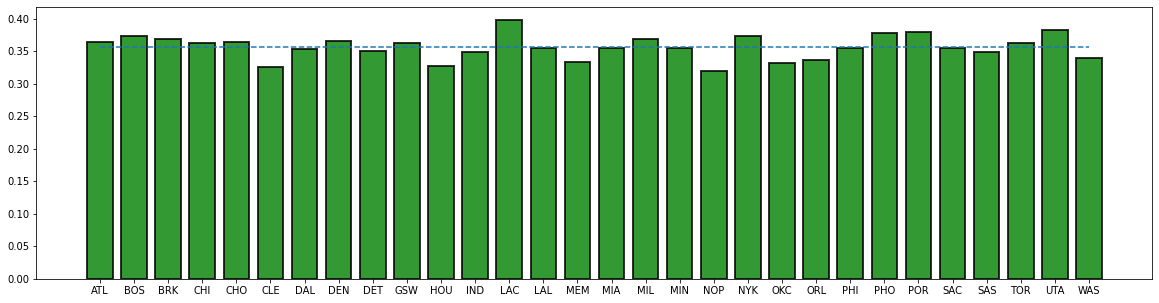

In [192]:
plt.figure(figsize=(20, 5))
plt.bar(grouped_table_mean.Team, grouped_table_mean['3-points Field Goal percentage'], width=0.75, alpha=0.8, bottom=0, edgecolor="k", linewidth=2, color='green')
ax = plt.subplot()
mean_line = ax.plot(grouped_table_mean.Team, y_mean_arr, linestyle='--')

# Общий вывод.
В настоящее время наблюдается усреднение качества выброшенных трехочковых бросков по всей лиге. Так называемый small-ball (игра пятерками из невысоких игроков с облием выброшенных трехочковых) в данный момент отходит на второй план.  